In [41]:
import impedance as imp
from impedance import preprocessing as pre
from impedance.models.circuits import Randles, CustomCircuit
import numpy as np
import matplotlib.pyplot as plt
import pathlib as pl
import pandas as pd
import glob
import os
from impedance.visualization import plot_bode, plot_nyquist

In [42]:
root = pl.Path("C:/Users/LENOVO/PycharmProjects/PythonProject/cosodien")
directory = root / 'gacsv'
all_files = glob.glob(os.path.join(directory, '*.csv'))

freqs = []
Zs = []
for file in all_files:
    freq, Z = pre.readCSV(file)
    freqs.append(freq)
    Zs.append(Z)

# print(np.shape(freqs), np.shape(Zs), np.shape(all_files))

In [43]:
circuits = []
# custom_cir = 'R0-p(CPE1,(R1-Wo1))-p(CPE2, R2)'
# c_cir = 'R_0-p(R_1,C_1)-p(R_1,C_1)-Wo_1'
c_cir = 'R0-p(R1,CPE1)-Wo1'
# c_cir = 'R0-p((R1-p(R2, C2)),C1)'
# p_cir = 'R0-p(R1,CPE1)-R2-p(R3,CPE2)'

initial_guess_c = [.1, .15, .1, .6, .1, 200]
# initial_guess3 = [.01, .1, .9, .005, .001, 200, .1, .9, .005]

# initial_guess_p = [.3, .005, .15, .9, .01, .005, .1, .9]
# initial_guess_c = [.01, .005, .005, .1, .1]

for freq, Z, filename in zip(freqs, Zs, all_files):
    name = os.path.basename(filename).split('.')[0]
    cir = CustomCircuit(initial_guess=initial_guess_c, name=name, circuit=c_cir)
    cir.fit(freq, Z)
    circuits.append(cir)

for circuit in circuits:
    print(circuit)
    # circuit.save(root / f'circuits/ga/{circuit.name}.json')


Name: 1
Circuit string: R0-p(R1,CPE1)-Wo1
Fit: True

Initial guesses:
     R0 = 1.00e-01 [Ohm]
     R1 = 1.50e-01 [Ohm]
  CPE1_0 = 1.00e-01 [Ohm^-1 sec^a]
  CPE1_1 = 6.00e-01 []
  Wo1_0 = 1.00e-01 [Ohm]
  Wo1_1 = 2.00e+02 [sec]

Fit parameters:
     R0 = 1.04e+02  (+/- 4.39e+02) [Ohm]
     R1 = 1.22e+03  (+/- 2.66e+03) [Ohm]
  CPE1_0 = 8.82e-06  (+/- 6.34e-05) [Ohm^-1 sec^a]
  CPE1_1 = 5.20e-01  (+/- 7.86e-01) []
  Wo1_0 = 3.06e+03  (+/- 4.80e+03) [Ohm]
  Wo1_1 = 1.67e-02  (+/- 2.57e-02) [sec]


Name: 10
Circuit string: R0-p(R1,CPE1)-Wo1
Fit: True

Initial guesses:
     R0 = 1.00e-01 [Ohm]
     R1 = 1.50e-01 [Ohm]
  CPE1_0 = 1.00e-01 [Ohm^-1 sec^a]
  CPE1_1 = 6.00e-01 []
  Wo1_0 = 1.00e-01 [Ohm]
  Wo1_1 = 2.00e+02 [sec]

Fit parameters:
     R0 = 1.73e+02  (+/- 6.73e+01) [Ohm]
     R1 = 8.37e+03  (+/- 7.68e+04) [Ohm]
  CPE1_0 = 1.11e-05  (+/- 3.57e-05) [Ohm^-1 sec^a]
  CPE1_1 = 6.93e-01  (+/- 7.32e-01) []
  Wo1_0 = 2.27e+02  (+/- 4.70e+03) [Ohm]
  Wo1_1 = 8.22e-03  (+/- 1.28e-01) [sec

In [44]:
# fits = []
# for f, circuit in zip(freqs, circuits):
#     fits.append(circuit.predict(f))
#
#
# for fit, Z in zip(fits, Zs):
#     fig, ax = plt.subplots(figsize=(12, 12))
#     # Plotting data
#     plot_nyquist(Z, ax=ax, label='data')
#
#     # Plotting fit
#     plot_nyquist(fit, ax=ax)

# plt.show()

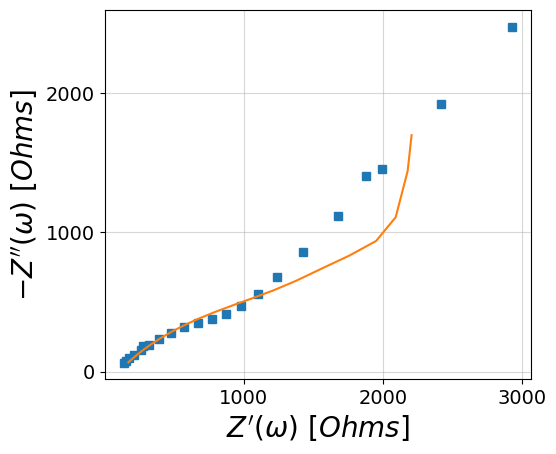

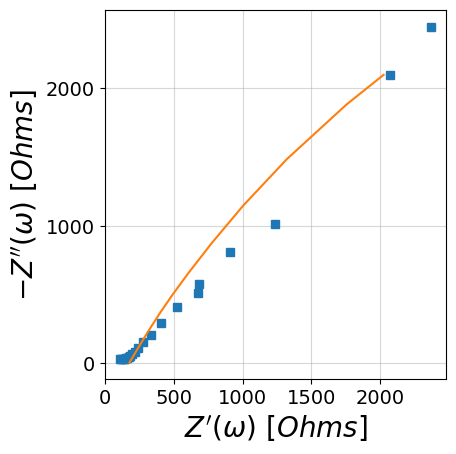

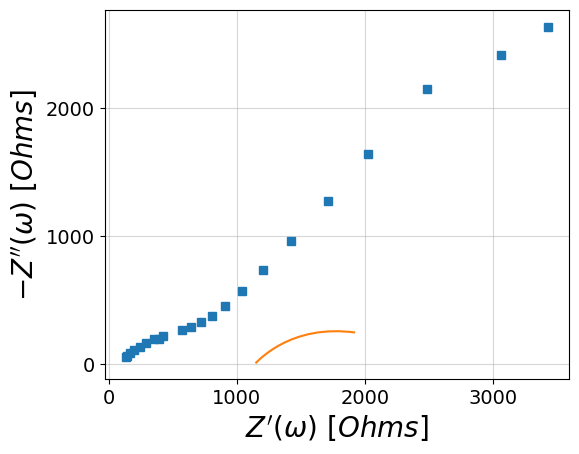

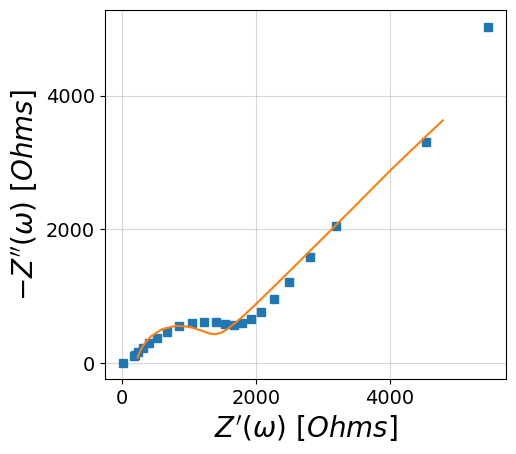

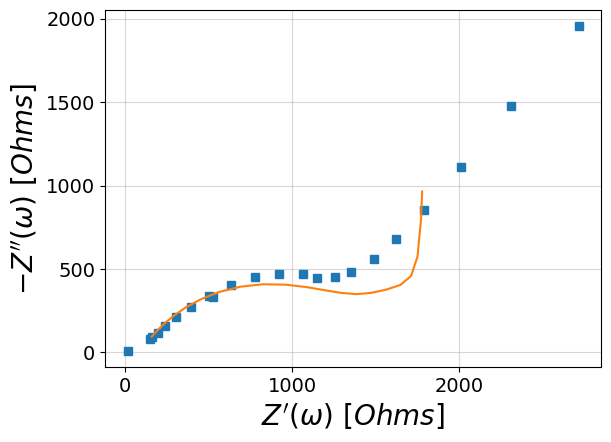

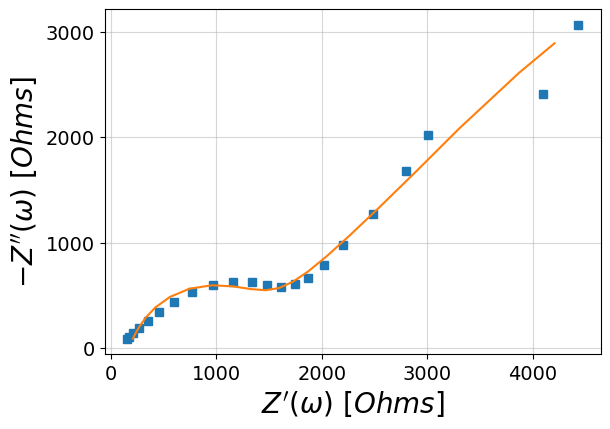

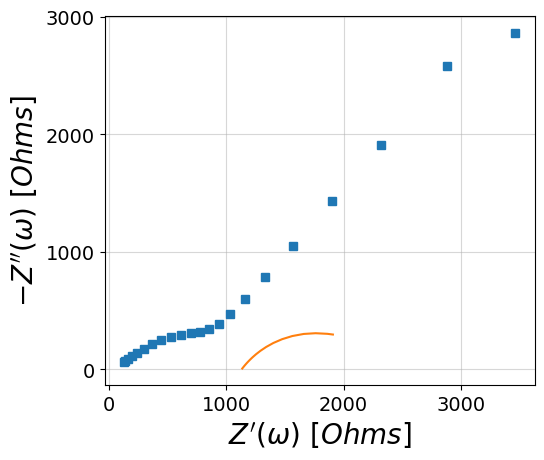

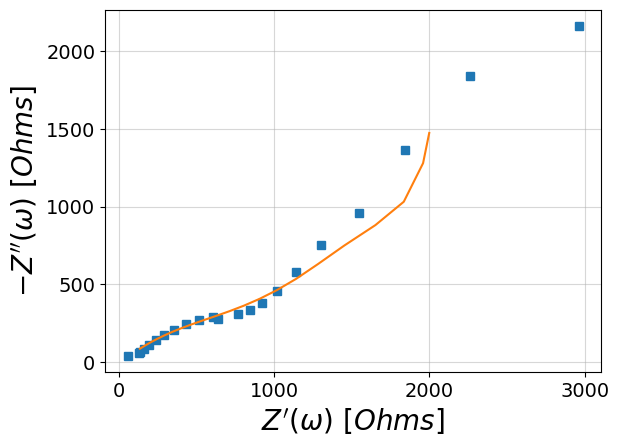

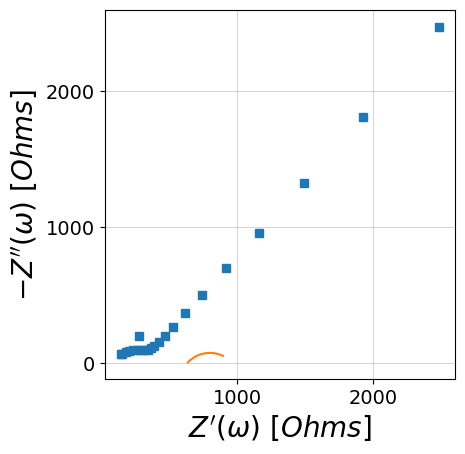

In [45]:
for circuit, freq, Z in zip(circuits, freqs, Zs):
    fig, ax = plt.subplots()
    circuit.plot(ax, f_data=freq, Z_data=Z, kind='nyquist')
    # fig.savefig(root/f"EISnyquist/ga/{circuit.name}.png")

In [46]:
# for circuit, freq, Z in zip(circuits, freqs, Zs):
#     circuit.plot(f_data=freq, Z_data=Z, kind='altair')

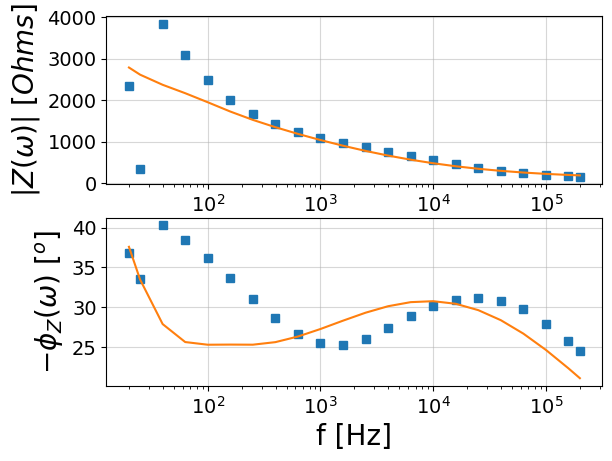

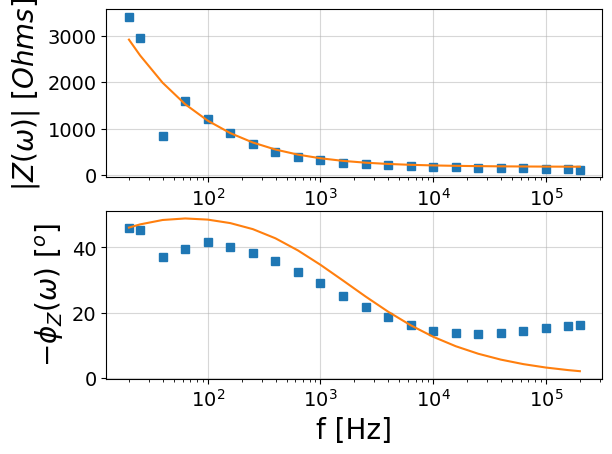

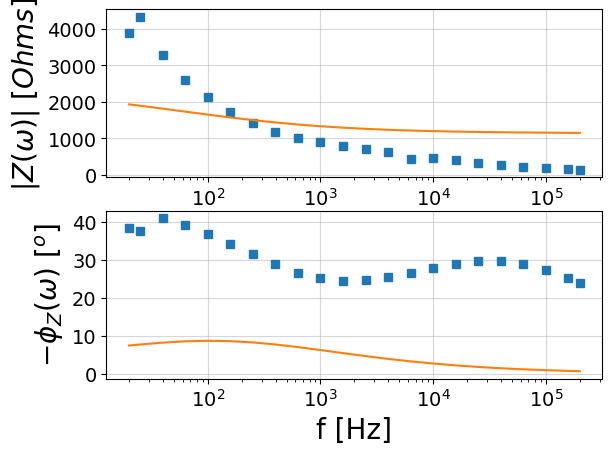

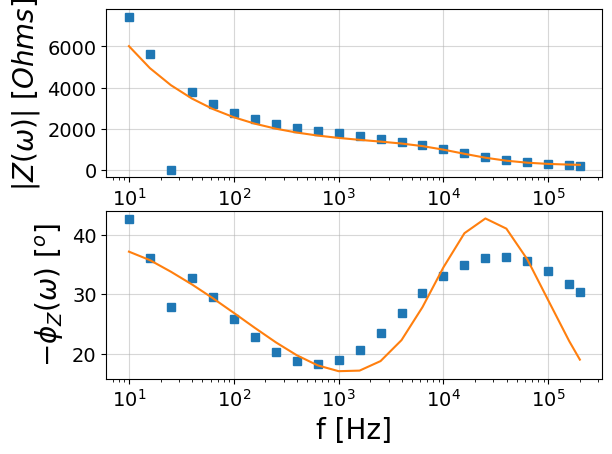

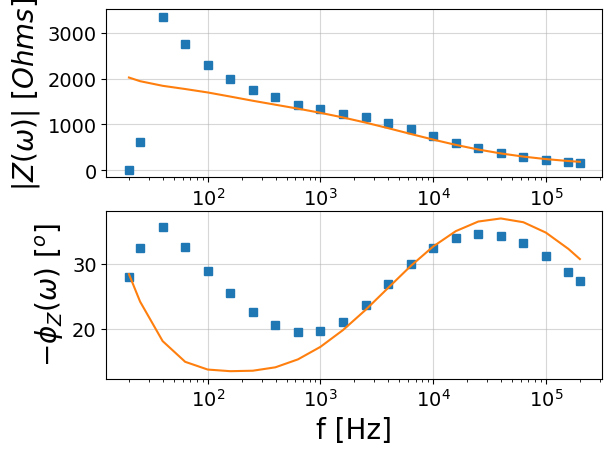

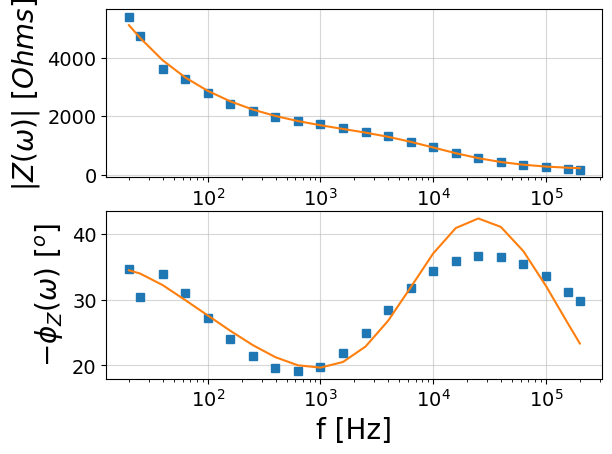

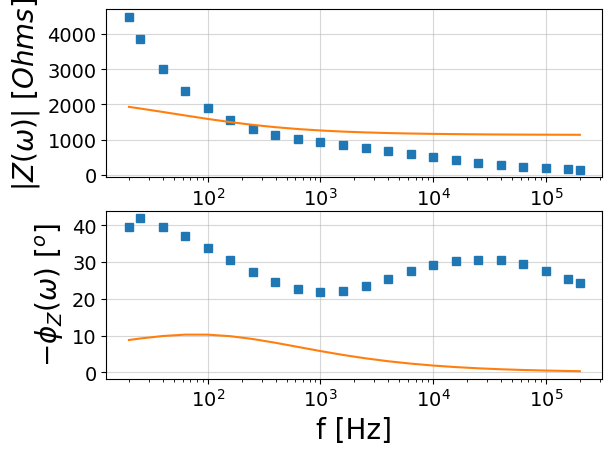

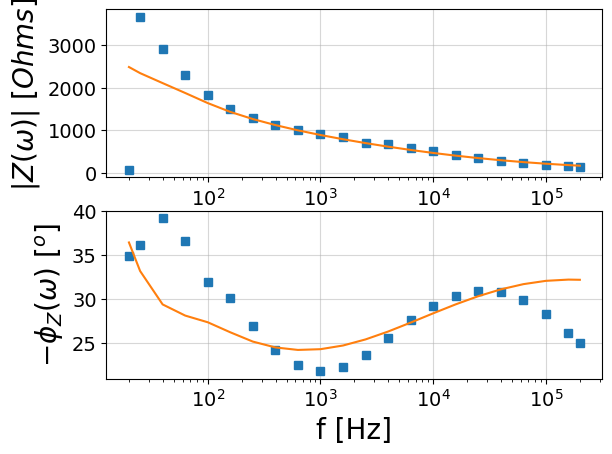

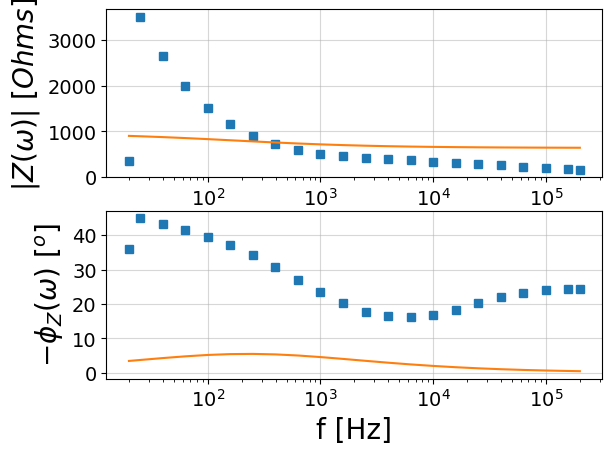

In [47]:
for circuit, freq, Z in zip(circuits, freqs, Zs):
    fig, ax = plt.subplots(nrows=2)
    # circuit.plot(ax, f_data=freq, Z_data=Z, kind='nyquist')
    circuit.plot(ax, f_data=freq, Z_data=Z, kind='bode', label=circuit.name)
    # fig.savefig(root / f'EISbode/ga/{circuit.name}.png')

In [48]:
# Validation
from impedance.validation import linKK
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

f, Z = pre.readCSV(root/"filtered_data/ga/3.csv")
# f, Z = pre.ignoreBelowX(f, Z)
# Z_scores = np.abs((Z - np.mean(Z)) / np.std(Z))
# filtered_Z = Z[Z_scores < 2]
#
# mask = ~np.isnan(filtered_Z)  # Keep only non-NaN values
# mask = mask.ravel()
# interp_func = interp1d(f[mask], filtered_Z[mask], kind='linear', fill_value="extrapolate")
# y_interp = interp_func(f)
# print(f, y_interp)
# print(np.shape(y_interp), np.shape(f))
#
# Z_smooth = savgol_filter(y_interp.real, window_length=5, polyorder=2)
# mask = f < 1000
# f = f[mask]
# Z = Z[mask]
N = 10

circuit = 'R_0'
initial_guess = [.015]
for i in range(N):
    circuit += f'-p(R_{i % 9 + 1},C_{i % 9 + 1})'
    initial_guess.append(.03/N)
    initial_guess.append(10**(3 - 6*i/N))

meas_model = CustomCircuit(initial_guess=initial_guess, circuit=circuit)
meas_model.fit(f, Z)

print(meas_model)


Circuit string: R_0-p(R_1,C_1)-p(R_2,C_2)-p(R_3,C_3)-p(R_4,C_4)-p(R_5,C_5)-p(R_6,C_6)-p(R_7,C_7)-p(R_8,C_8)-p(R_9,C_9)-p(R_1,C_1)
Fit: True

Initial guesses:
    R_0 = 1.50e-02 [Ohm]
    R_1 = 3.00e-03 [Ohm]
    C_1 = 1.00e+03 [F]
    R_2 = 3.00e-03 [Ohm]
    C_2 = 2.51e+02 [F]
    R_3 = 3.00e-03 [Ohm]
    C_3 = 6.31e+01 [F]
    R_4 = 3.00e-03 [Ohm]
    C_4 = 1.58e+01 [F]
    R_5 = 3.00e-03 [Ohm]
    C_5 = 3.98e+00 [F]
    R_6 = 3.00e-03 [Ohm]
    C_6 = 1.00e+00 [F]
    R_7 = 3.00e-03 [Ohm]
    C_7 = 2.51e-01 [F]
    R_8 = 3.00e-03 [Ohm]
    C_8 = 6.31e-02 [F]
    R_9 = 3.00e-03 [Ohm]
    C_9 = 1.58e-02 [F]
    R_1 = 3.00e-03 [Ohm]
    C_1 = 3.98e-03 [F]

Fit parameters:
    R_0 = 3.48e+02  (+/- 6.39e+02) [Ohm]
    R_1 = 3.95e+00  (+/- 5.31e+00) [Ohm]
    C_1 = 9.99e+02  (+/- 1.55e+00) [F]
    R_2 = 7.04e-03  (+/- 8.17e-01) [Ohm]
    C_2 = 2.12e+02  (+/- 1.82e-01) [F]
    R_3 = 5.03e-02  (+/- 6.81e-08) [Ohm]
    C_3 = 2.51e+01  (+/- 3.90e+00) [F]
    R_4 = 1.13e-01  (+/- 1.96e+02) [Oh

<>:15: SyntaxWarning: invalid escape sequence '\O'
<>:15: SyntaxWarning: invalid escape sequence '\O'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_52732\800945023.py:15: SyntaxWarning: invalid escape sequence '\O'
  plot_nyquist(meas_model.predict(f), ax=ax1, fmt='-', scale=1e3, units='\Omega')


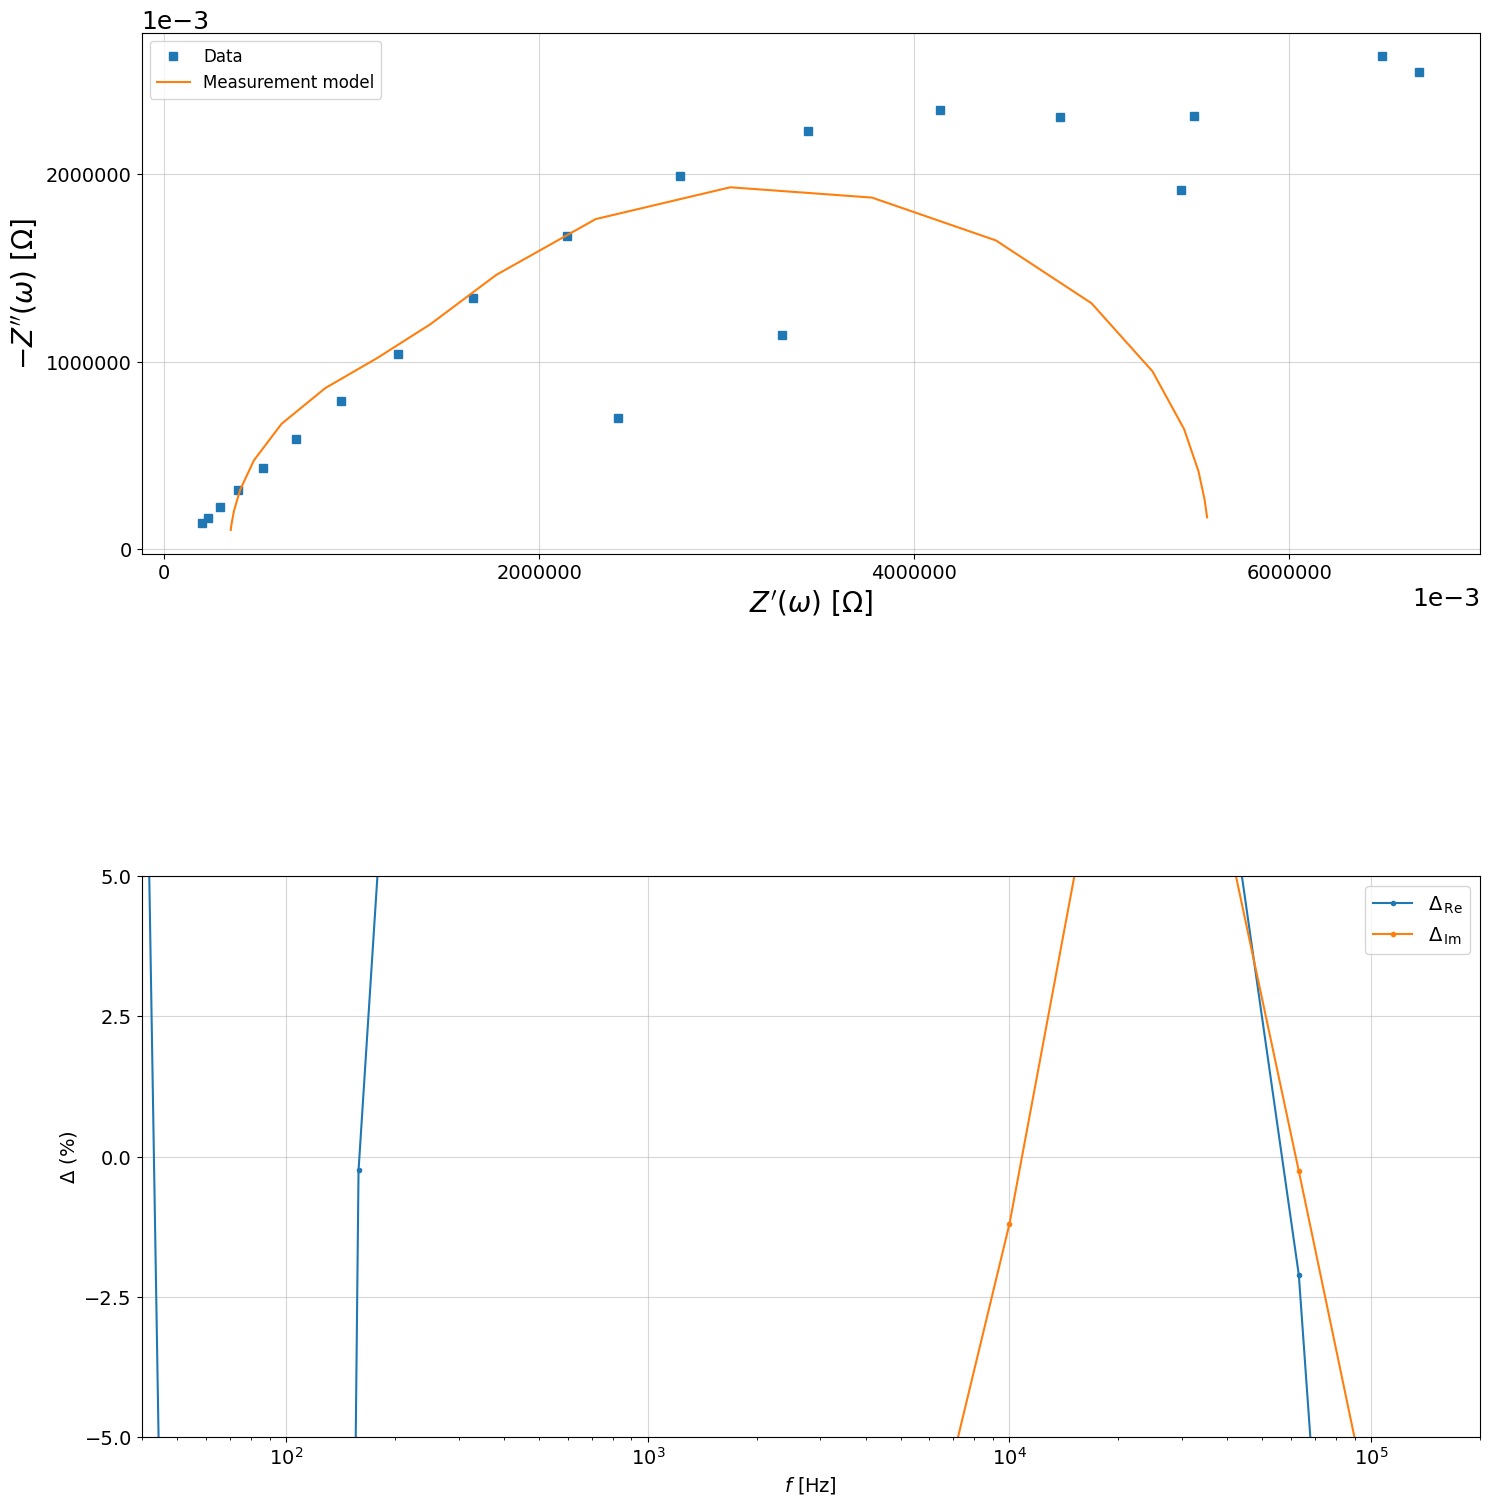

In [49]:
from impedance.visualization import plot_nyquist, plot_residuals

res_meas_real = (Z - meas_model.predict(f)).real/np.abs(Z)
res_meas_imag = (Z - meas_model.predict(f)).imag/np.abs(Z)

fig = plt.figure(figsize=(15,18))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

# plot original data
plot_nyquist(Z, ax=ax1, fmt='s')

# plot measurement model
plot_nyquist(meas_model.predict(f), ax=ax1, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Measurement model'], loc=2, fontsize=12)

# Plot residuals
plot_residuals(ax2, f, res_meas_real, res_meas_imag, y_limits=(-5,5))

plt.tight_layout()
plt.show()

In [50]:
# root = pl.Path("D:/Linh Python/Cosodien")
# directory = root / 'filtered_data/lon/2.csv'
# file = glob.glob(os.path.join(directory, '2.csv'))
#
# freq, Z = pre.readCSV(directory)
# cir = 'R0-p(R1,CPE1)-p(R2,CPE2)'
# initial_guess = [.15, .05, .1, .9, .005, .1, .9]
#
# cir = CustomCircuit(initial_guess=initial_guess, circuit=cir, name=2)
# cir.fit(freq, Z)
# fig, ax = plt.subplots()
# fig1, ax1 = plt.subplots(nrows=2)
# cir.plot(ax, f_data=freq, Z_data=Z, kind='nyquist')
# cir.plot(ax1, f_data=freq, Z_data=Z, kind='bode')
# cir.save(root / f'circuits/ga/2.json')
# fig.savefig(root / f'EISnyquist/ga/2.png')
# fig1.savefig(root / f'EISbode/ga/2.png')



In [51]:
# pcir = 'R0-p(CPE1, R1-Wo1)-Wo2-L1'
# ini = [1.0, 1.0, .9, .15, .2, 200,.01,200,0.03]
#
# # root = pl.Path("D:/Linh Python/Cosodien")
# directory = root / 'final_format/ga/2_0_1.csv'
# files = glob.glob(os.path.join(directory, '1_0_*.csv'))
#
# f, Z = pre.readCSV(directory)
#
# cir = CustomCircuit(initial_guess=ini, circuit=pcir)
# cir.fit(f, Z)
# print(cir)
# fig, ax = plt.subplots()
# fig1, ax1 = plt.subplots(nrows=2)
# cir.plot(ax, f_data=f, Z_data=Z, kind='nyquist')
# cir.plot(ax1, f_data=f, Z_data=Z, kind='bode')
# cir.save(root / f'circuits/ga/2.json')
# fig.savefig(root / f'EISnyquist/ga/2.png')
# fig1.savefig(root / f'EISbode/ga/2.png')


In [52]:
import json
import pandas as pd
import csv
import re
path = root / "circuits/json/ga/"
all_files = glob.glob(os.path.join(path, '*.json'))
for file in all_files:
    name = os.path.basename(file).split('.')[0]
    with open(file) as f:
        data = json.load(f)
    circuit_elements = re.findall(r'[A-Za-z]+\d+', data["Circuit String"])

    # df = pd.read_json(file)
    # df.head()
    # df.to_csv(root / f'circuits/csv/lon/{name}.csv', index=False)

    # df = open(root / f'circuits/csv/lon/{name}.csv', 'w', newline='')
    # cw = csv.writer(df)
    #
    # h = data.keys()
    # cw.writerow(h)
    # cw.writerow(data.values())
    # cr = csv.reader(df)
    # df.close()
    with open(root / f'circuits/csv/ga/{name}.csv', mode="w", newline="") as file:
        writer = csv.writer(file)

        # Write headers
        writer.writerow(["Index", "Parameter Value", "Circuit Element"])

        param_index = 0
        for element in circuit_elements:
            if "CPE" in element or "Wo" in element:
                # Write two rows for elements containing "CPE" or "Wo"
                writer.writerow([param_index, f"{data['Parameters'][param_index]:.2e}", element + '_0'])
                param_index += 1
                writer.writerow([param_index, f"{data['Parameters'][param_index]:.2e}", element + '_1'])
            else:
                # Write one row for other elements
                writer.writerow([param_index, f"{data['Parameters'][param_index]:.2e}", element])

            param_index += 1


    print('CSV created')



CSV created
CSV created
CSV created
CSV created
CSV created
CSV created
CSV created
